In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
import math




In [2]:
fname_prefix='/home/ubuntu/kp/data/2024July18/'
waittime=30

In [3]:
'''#save results -- I had to do this because I accidentally overwrote the array files but had the data loaded here, and so I'm re-saving from this notebook.
np.save(fname_prefix+'core',np.asarray(core_all))
np.save(fname_prefix+'veto',np.asarray(veto_all))
np.save(fname_prefix+'vetocycles',np.asarray(veto_cycles_all))
np.save(fname_prefix+'corecycles',np.asarray(core_cycles_all))
np.save(fname_prefix+'successfultrigger',np.asarray(successful_triggers_all/0.73))
np.save(fname_prefix+'readoutdone',np.asarray(readout_dones_all/0.73))'''

"#save results -- I had to do this because I accidentally overwrote the array files but had the data loaded here, and so I'm re-saving from this notebook.\nnp.save(fname_prefix+'core',np.asarray(core_all))\nnp.save(fname_prefix+'veto',np.asarray(veto_all))\nnp.save(fname_prefix+'vetocycles',np.asarray(veto_cycles_all))\nnp.save(fname_prefix+'corecycles',np.asarray(core_cycles_all))\nnp.save(fname_prefix+'successfultrigger',np.asarray(successful_triggers_all/0.73))\nnp.save(fname_prefix+'readoutdone',np.asarray(readout_dones_all/0.73))"

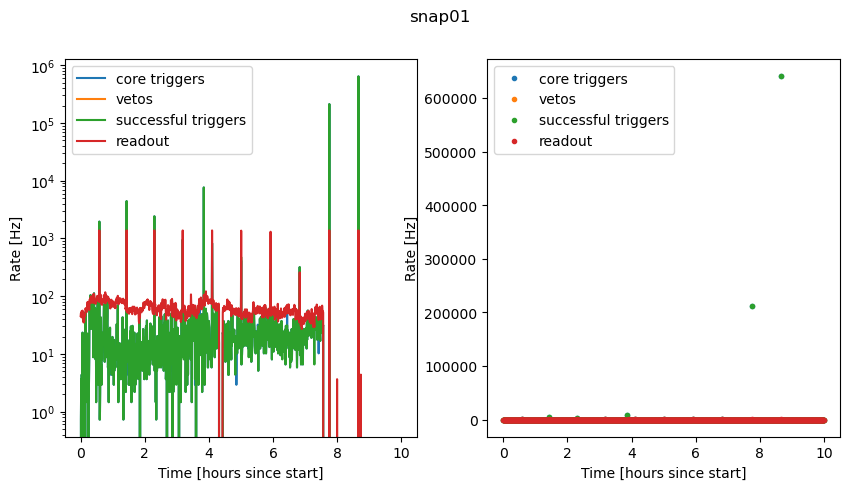

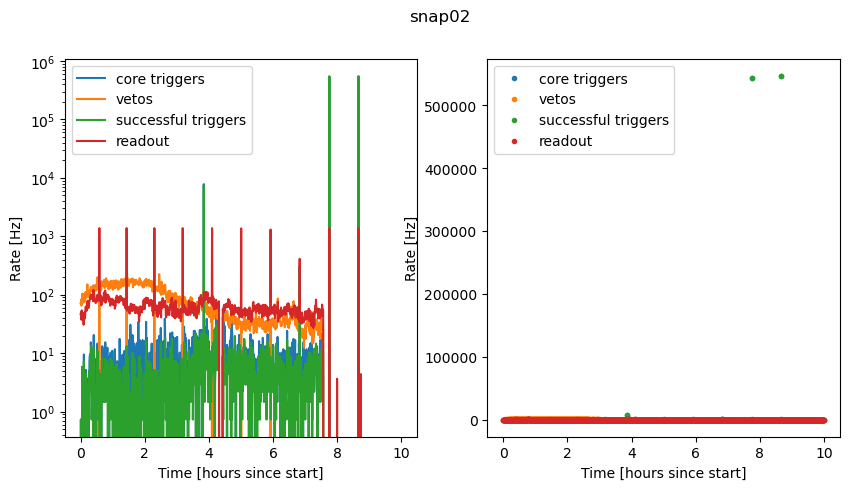

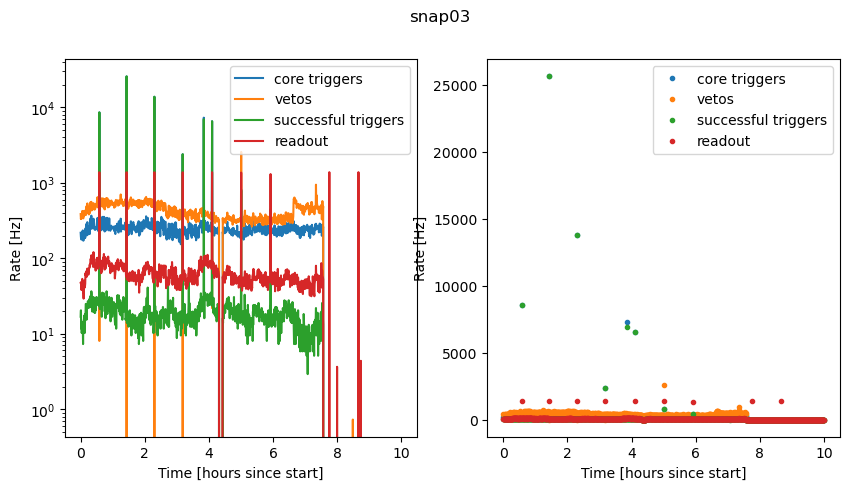

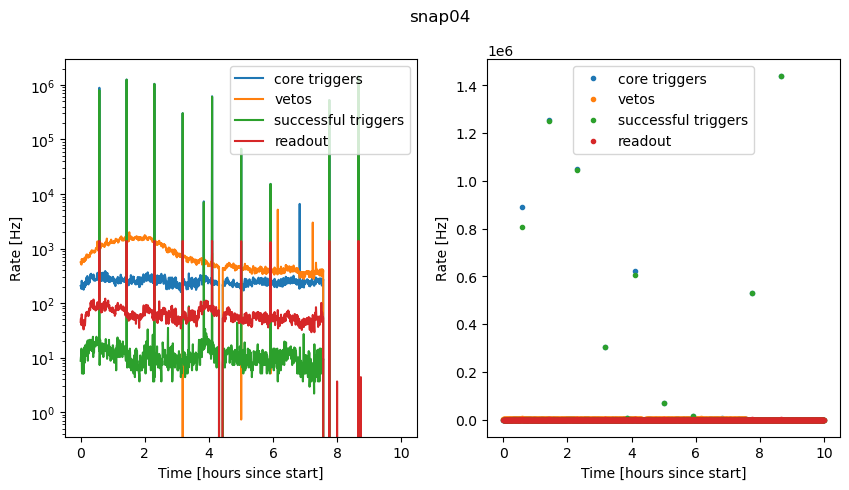

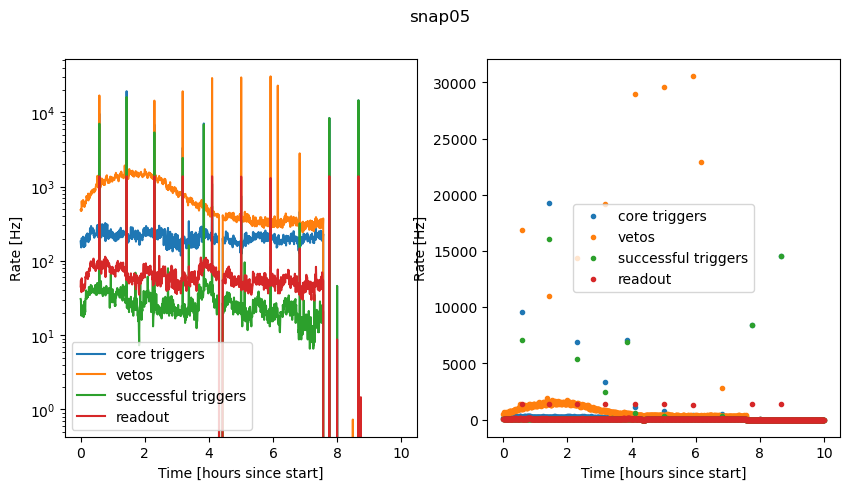

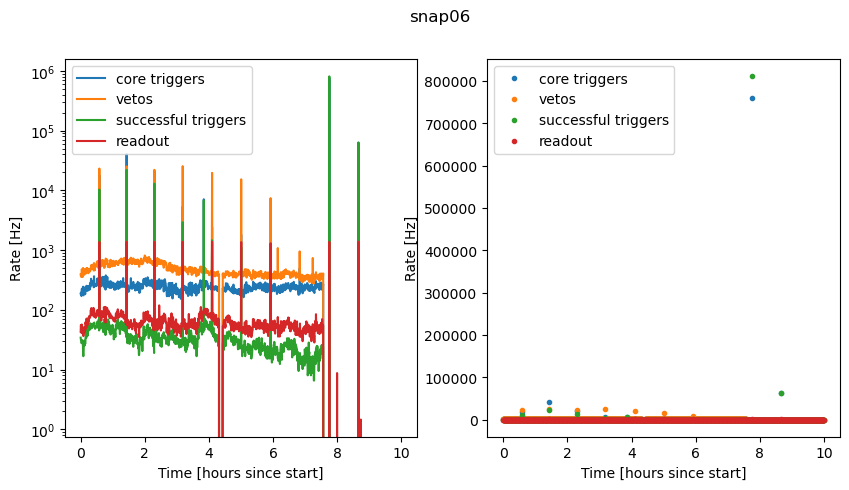

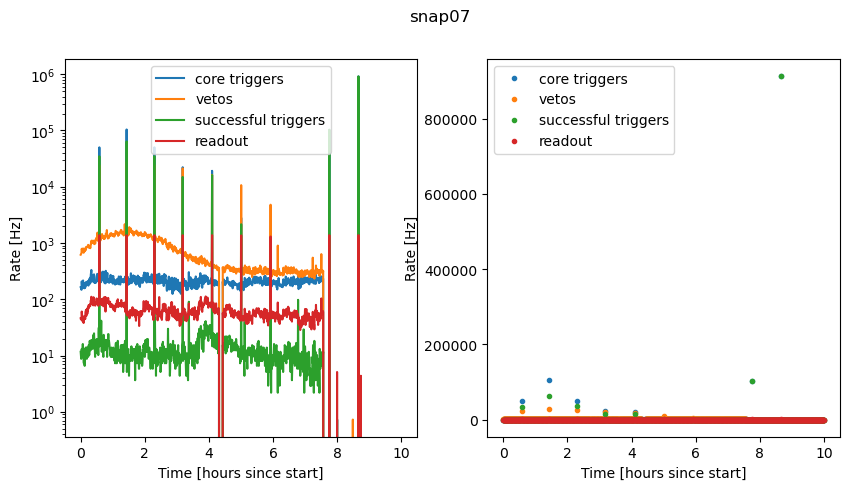

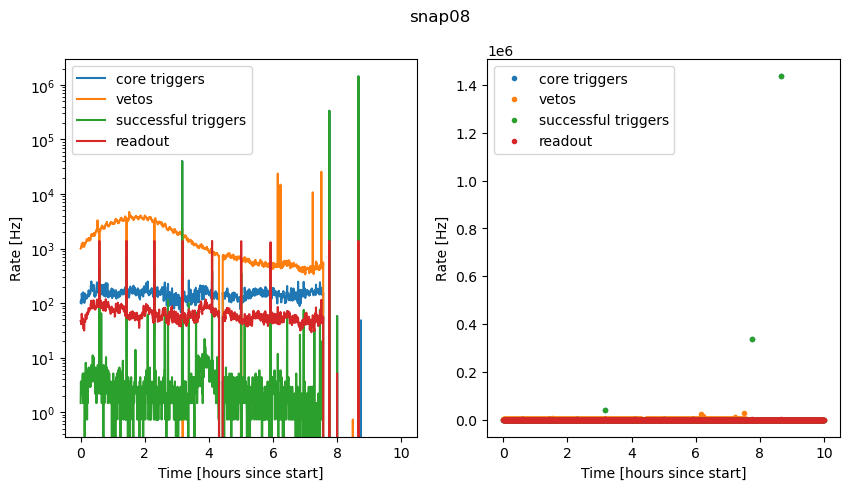

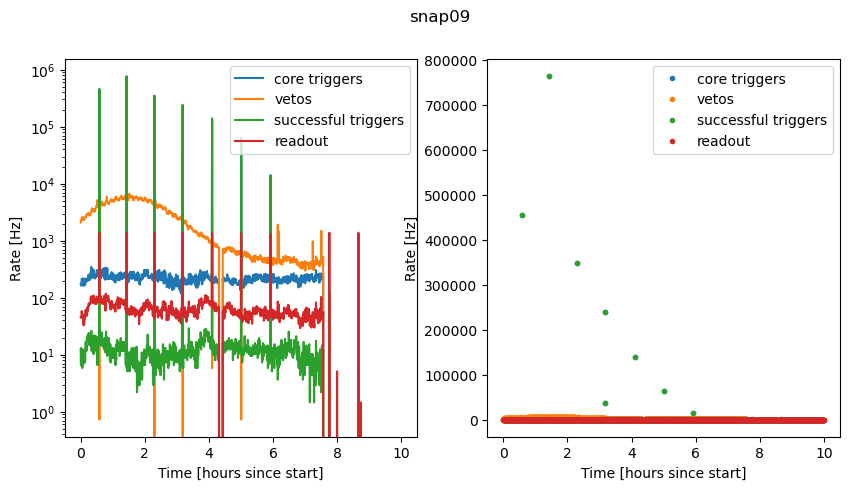

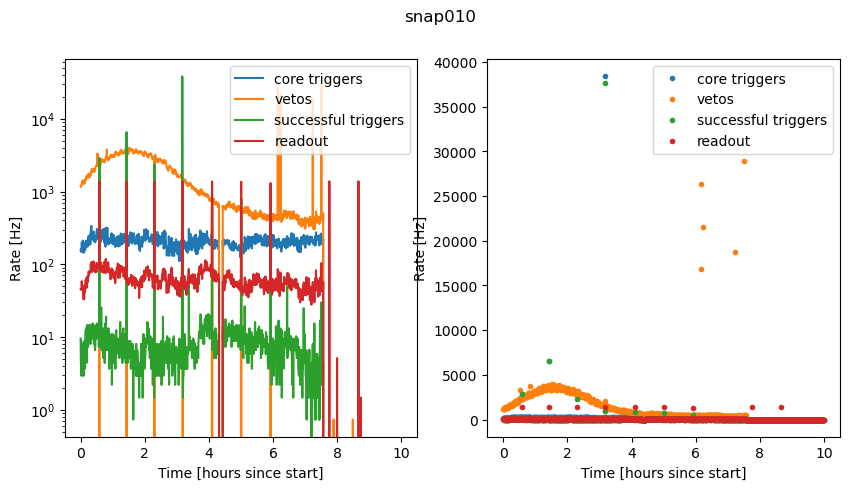

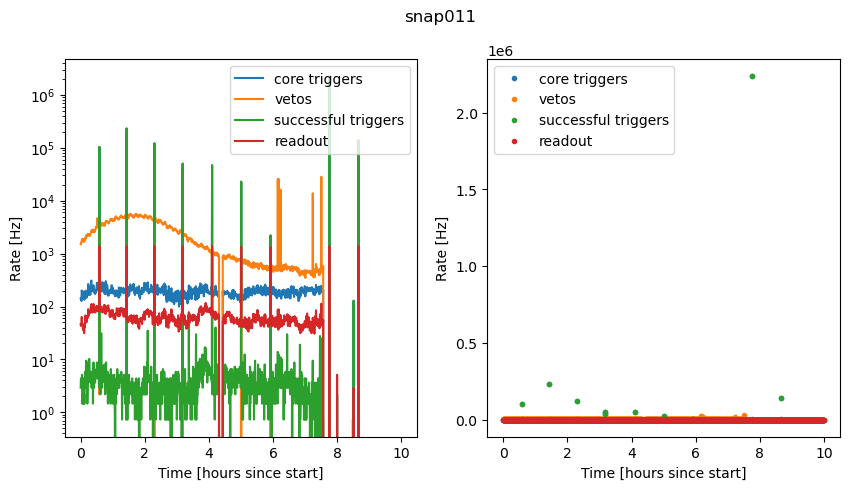

In [4]:


ok_snaps=[0,1,2,3,4,5,6,7,8,9,10] #zero indexed

veto_all=(np.load(fname_prefix+'veto'+'.npy'))*0.73 #convert to Hz
core_all=(np.load(fname_prefix+'core'+'.npy'))*0.73 #convert to Hz

veto_cycles_all=np.load(fname_prefix+'vetocycles'+'.npy')
core_cycles_all=np.load(fname_prefix+'corecycles'+'.npy')

successful_triggers_all=np.load(fname_prefix+'successfultrigger'+'.npy')*0.73
readout_dones_all=np.load(fname_prefix+'readoutdone'+'.npy')*0.73


for b in ok_snaps:
    core=core_all[b]
    veto=veto_all[b]
    successful_trigger=successful_triggers_all[b]
    readout_done=readout_dones_all[b]
    veto_cycle=veto_cycles_all[b]
    core_cycle=core_cycles_all[b]
    timeaxis=np.asarray(range(len(core)))*(waittime)*(1/60)*(1/60) #approximate time in hours since start of test
    plt.figure(figsize=(10,5),dpi=100)
    plt.suptitle('snap0'+str(b+1))
    
    plt.subplot(121)
    plt.semilogy(timeaxis,core,label='core triggers')
    plt.semilogy(timeaxis,veto,label='vetos')
    plt.semilogy(timeaxis,successful_trigger,label='successful triggers')
    plt.plot(timeaxis,readout_done,label='readout')

    plt.ylabel("Rate [Hz]")
    plt.xlabel("Time [hours since start]")
    plt.legend()
    
    plt.subplot(122)
    plt.plot(timeaxis,core,'.',label='core triggers')
    plt.plot(timeaxis,veto,'.',label='vetos')
    plt.plot(timeaxis,successful_trigger,'.',label='successful triggers')
    plt.plot(timeaxis,readout_done,'.',label='readout')

    plt.ylabel("Rate [Hz]")
    plt.xlabel("Time [hours since start]")
    plt.legend()



In [5]:
print('Mean core trigger rate from each snap board')
for b in ok_snaps:
    average_rate=np.mean(core_all[b])
    print('SNAP'+str(b+1)+': ',round(average_rate,2) )

print('------')
print('Mean veto rate from each snap board')
for b in ok_snaps:
    average_rate=np.mean(veto_all[b])
    print('SNAP'+str(b+1)+': ',round(average_rate,2) )
    
print('------')
    
print('Mean successful trigger rate from each snap board')
for b in ok_snaps:
    average_rate=np.mean(successful_triggers_all[b])
    print('SNAP'+str(b+1)+': ',round(average_rate,2) )
    
print('------')


print('Mean readout rate from each snap board')
for b in ok_snaps:
    average_rate=np.mean(readout_dones_all[b])
    print('SNAP'+str(b+1)+': ',round(average_rate,2) )
    


Mean core trigger rate from each snap board
SNAP1:  743.02
SNAP2:  920.94
SNAP3:  235.22
SNAP4:  5332.32
SNAP5:  213.52
SNAP6:  946.34
SNAP7:  1208.36
SNAP8:  1621.8
SNAP9:  1878.61
SNAP10:  197.55
SNAP11:  2631.76
------
Mean veto rate from each snap board
SNAP1:  0.0
SNAP2:  59.89
SNAP3:  316.62
SNAP4:  577.94
SNAP5:  686.66
SNAP6:  469.38
SNAP7:  639.95
SNAP8:  1229.28
SNAP9:  1664.31
SNAP10:  1203.14
SNAP11:  1665.49
------
Mean successful trigger rate from each snap board
SNAP1:  743.06
SNAP2:  918.22
SNAP3:  68.0
SNAP4:  5064.26
SNAP5:  71.6
SNAP6:  801.32
SNAP7:  995.29
SNAP8:  1514.2
SNAP9:  1724.31
SNAP10:  49.54
SNAP11:  2492.78
------
Mean readout rate from each snap board
SNAP1:  56.02
SNAP2:  56.09
SNAP3:  55.76
SNAP4:  55.97
SNAP5:  56.16
SNAP6:  56.06
SNAP7:  56.2
SNAP8:  56.54
SNAP9:  56.37
SNAP10:  56.42
SNAP11:  56.39


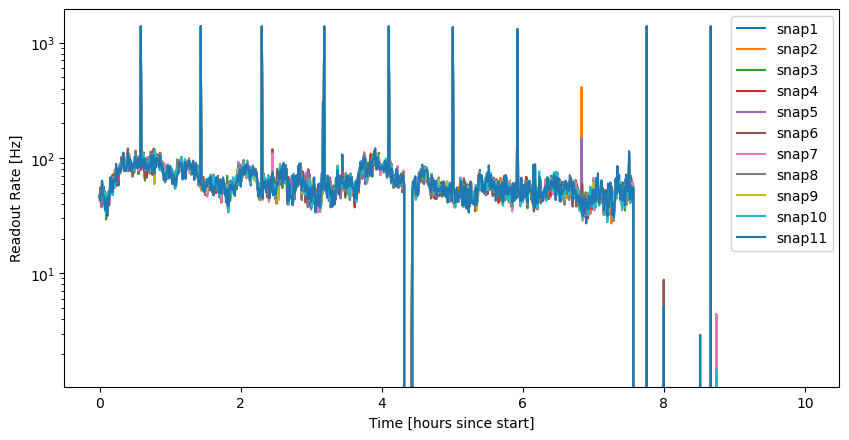

In [6]:
plt.figure(figsize=(10,5),dpi=100)
for b in ok_snaps:
    core=core_all[b]
    veto=veto_all[b]
    successful_trigger=successful_triggers_all[b]
    readout_done=readout_dones_all[b]
    veto_cycle=veto_cycles_all[b]
    core_cycle=core_cycles_all[b]
    timeaxis=np.asarray(range(len(core)))*(waittime)*(1/60)*(1/60) #time in hours since start of test, approximated as each board having one measurement every 7*32.75 seconds
    plt.semilogy(timeaxis,readout_done,label='snap'+str(b+1))
    plt.ylabel("Readout Rate [Hz]")
    plt.xlabel("Time [hours since start]")
    plt.legend()
    #plt.ylim(0,200)

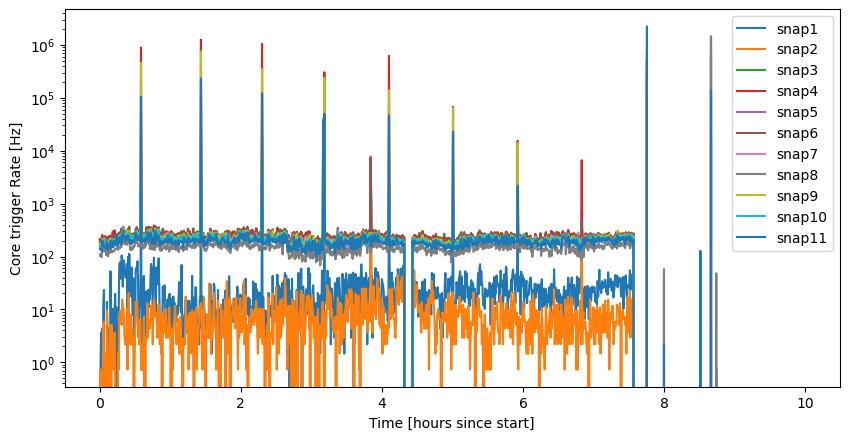

In [7]:
plt.figure(figsize=(10,5),dpi=100)
for b in ok_snaps:
    core=core_all[b]
    veto=veto_all[b]
    successful_trigger=successful_triggers_all[b]
    readout_done=readout_dones_all[b]
    veto_cycle=veto_cycles_all[b]
    core_cycle=core_cycles_all[b]
    timeaxis=np.asarray(range(len(core)))*(waittime)*(1/60)*(1/60) #time in hours since start of test, approximated as each board having one measurement every 7*32.75 seconds
    plt.semilogy(timeaxis,core,label='snap'+str(b+1))
    plt.ylabel("Core trigger Rate [Hz]")
    plt.xlabel("Time [hours since start]")
    plt.legend()
    #plt.ylim(0,200)

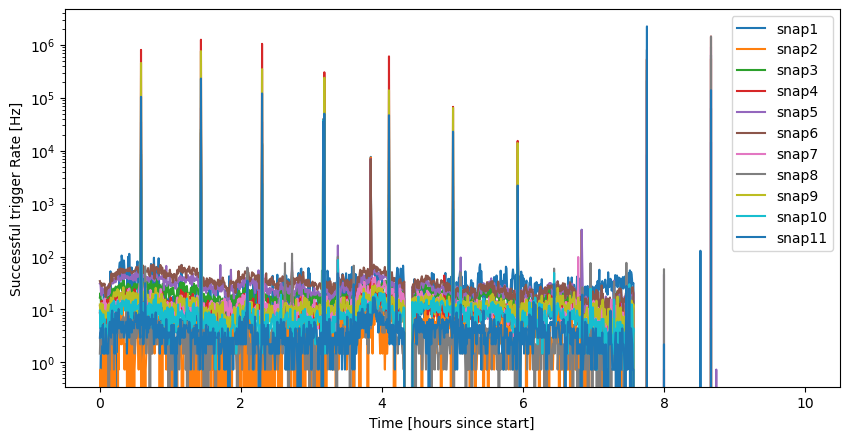

In [8]:
plt.figure(figsize=(10,5),dpi=100)
for b in [0,1,2,3,4,5,6,7,8,9,10]:
    core=core_all[b]
    veto=veto_all[b]
    successful_trigger=successful_triggers_all[b]
    readout_done=readout_dones_all[b]
    veto_cycle=veto_cycles_all[b]
    core_cycle=core_cycles_all[b]
    timeaxis=np.asarray(range(len(successful_trigger)))*(waittime)*(1/60)*(1/60) #time in hours since start of test, approximated as each board having one measurement every 7*32.75 seconds
    plt.semilogy(timeaxis,successful_trigger,label='snap'+str(b+1))
    plt.ylabel("Successful trigger Rate [Hz]")
    plt.xlabel("Time [hours since start]")
    plt.legend()
    #plt.ylim(0,200)

/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/home/u

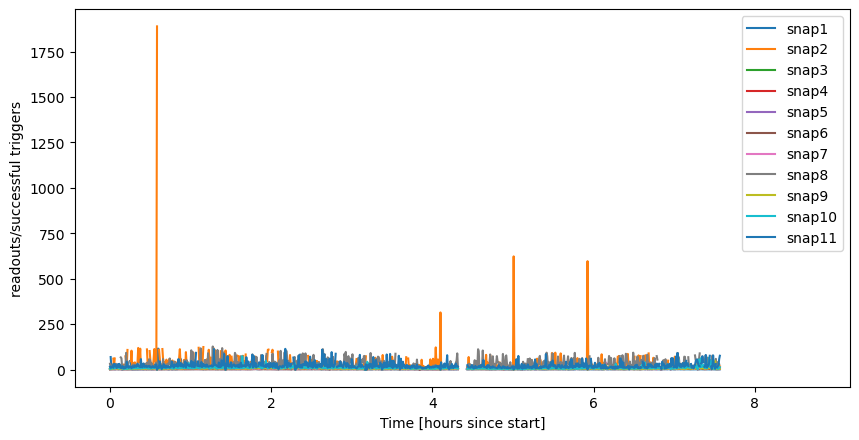

In [9]:
plt.figure(figsize=(10,5),dpi=100)
for b in ok_snaps:
    core=core_all[b]
    veto=veto_all[b]
    successful_trigger=successful_triggers_all[b]
    readout_done=readout_dones_all[b]
    veto_cycle=veto_cycles_all[b]
    core_cycle=core_cycles_all[b]
    timeaxis=np.asarray(range(len(core)))*(waittime)*(1/60)*(1/60) #time in hours since start of test, approximated as each board having one measurement every 7*32.75 seconds
    plt.plot(timeaxis,readout_done/successful_trigger,label='snap'+str(b+1))
    plt.ylabel("readouts/successful triggers")
    plt.xlabel("Time [hours since start]")
    plt.legend()

Plot above shows ratio of readouts to successful triggers for each board.  A readout occurs whenever any board triggers, and so the readout rate can be larger than an individual board's trigger rate.  However, the ratio can also be less than one since triggers continue to be logged while the board is in readout state.

0 0.0
1 0.0008143667844969783
2 0.004281903909327725
3 0.007936540409065313
4 0.010074331624089423
5 0.006704035196592541
6 0.009045355235705854
7 0.01739193183640117
8 0.023483765799491726
9 0.017231670399749047
10 0.023903673603771897
average all  0.010987961345335607


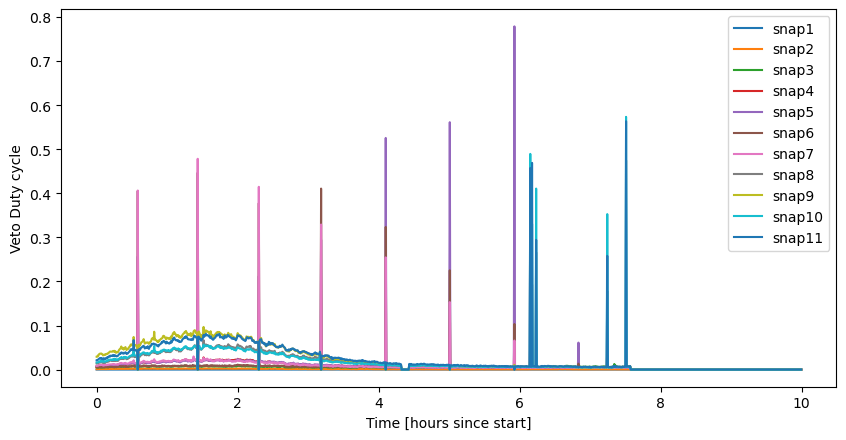

In [10]:
plt.figure(figsize=(10,5),dpi=100)
mean_duty_cycle_per_board=np.zeros(11)
for b in ok_snaps:
    core=core_all[b]
    veto=veto_all[b]
    successful_trigger=successful_triggers_all[b]
    readout_done=readout_dones_all[b]
    veto_cycle=veto_cycles_all[b]
    core_cycle=core_cycles_all[b]
    timeaxis=np.asarray(range(len(core)))*(waittime)*(1/60)*(1/60) #time in hours since start of test, approximated as each board having one measurement every 7*32.75 seconds
    plt.plot(timeaxis,veto_cycle/((2**28)-1),label='snap'+str(b+1))
    mean_duty_cycle_per_board[b]=np.mean(veto_cycle/((2**28)-1))
    plt.ylabel("Veto Duty cycle")
    plt.xlabel("Time [hours since start]")
    plt.legend()
    #print('veto cycle')
    print(b,mean_duty_cycle_per_board[b])
    #print('core cycle')
    #print(b,np.mean(core_cycle)/((2**28)-1))
print('average all ',np.mean(mean_duty_cycle_per_board))


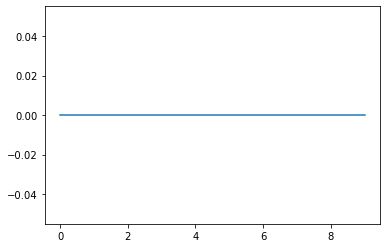

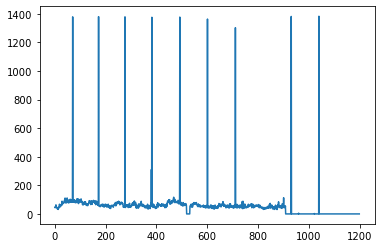

In [11]:
#find cutoff
plt.figure()
plt.plot(veto_cycles_all[-1,1090:1100])
plt.figure()
plt.plot(readout_dones_all[-1,:])


#1436

In [12]:
cutoff=1099
print('veto average all ',(1/((2**28)-1))*np.mean(veto_cycles_all[:,:cutoff]))
print('readout average all',np.mean(readout_dones_all[:,:cutoff]))
print('average core trigger rate',np.mean(core_all[2:,:cutoff]))

veto average all  0.011997773989447432
readout average all 61.34234262552734
average core trigger rate 1730.7221716712158


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0

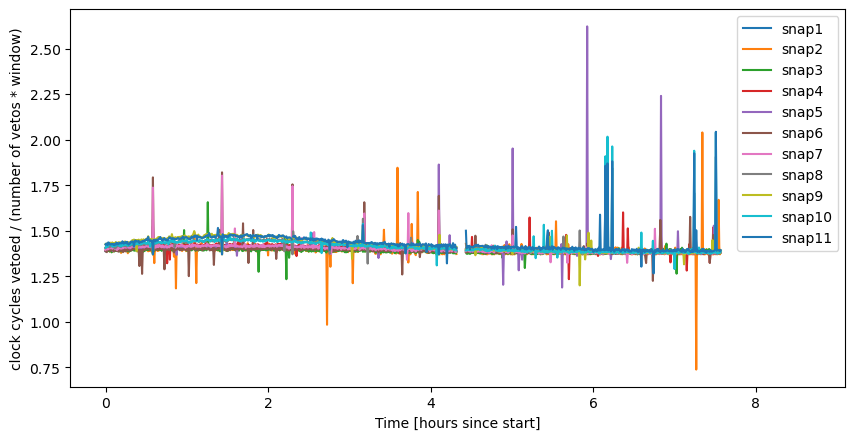

In [13]:
plt.figure(figsize=(10,5),dpi=100)
trigger_window=int(round(1.96e8*100/3e8,1)) #number of clock cycles to travel 100 meters
veto_window=int(round(1.96e8*2000/3e8,1)) #number of clock cycles to travel 2000 meters
for b in ok_snaps:
    core=core_all[b]
    veto=veto_all[b]
    successful_trigger=successful_triggers_all[b]
    readout_done=readout_dones_all[b]
    veto_cycle=veto_cycles_all[b]
    core_cycle=core_cycles_all[b]
    timeaxis=np.asarray(range(len(core)))*(waittime)*(1/60)*(1/60) #time in hours since start of test, approximated as each board having one measurement every 7*32.75 seconds
    plt.plot(timeaxis,(veto_cycle/(2*veto_window*veto)),label='snap'+str(b+1))
    plt.ylabel("clock cycles vetoed / (number of vetos * window)")
    plt.xlabel("Time [hours since start]")
    plt.legend()
    

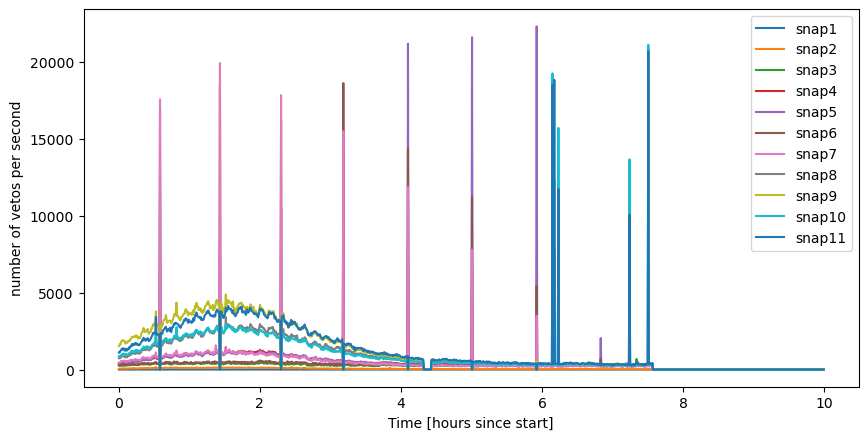

In [14]:
plt.figure(figsize=(10,5),dpi=100)
trigger_window=int(round(1.96e8*100/3e8,1)) #number of clock cycles to travel 100 meters
veto_window=int(round(1.96e8*2000/3e8,1)) #number of clock cycles to travel 2000 meters
for b in ok_snaps:
    core=core_all[b]
    veto=veto_all[b]
    successful_trigger=successful_triggers_all[b]
    readout_done=readout_dones_all[b]
    veto_cycle=veto_cycles_all[b]
    core_cycle=core_cycles_all[b]
    timeaxis=np.asarray(range(len(core)))*(waittime)*(1/60)*(1/60) #time in hours since start of test, approximated as each board having one measurement every 7*32.75 seconds
    plt.plot(timeaxis,(veto*0.73),label='snap'+str(b+1))
    plt.ylabel("number of vetos per second")
    plt.xlabel("Time [hours since start]")
    plt.legend()

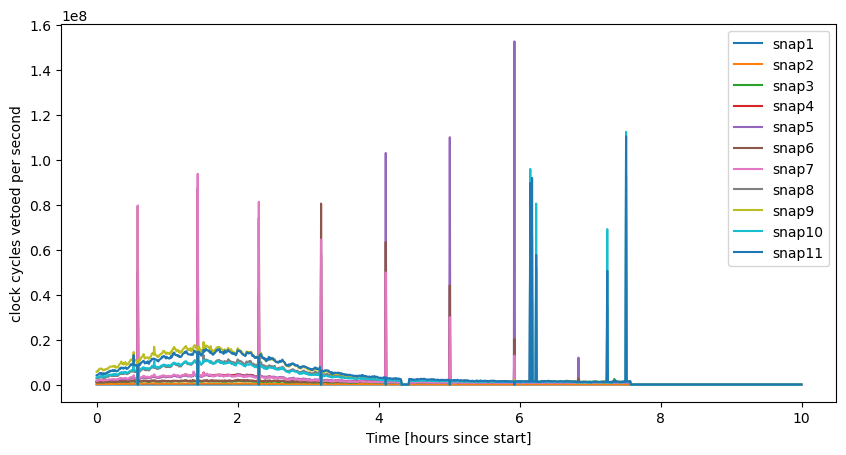

In [15]:
plt.figure(figsize=(10,5),dpi=100)
trigger_window=int(round(1.96e8*100/3e8,1)) #number of clock cycles to travel 100 meters
veto_window=int(round(1.96e8*2000/3e8,1)) #number of clock cycles to travel 2000 meters
for b in ok_snaps:
    core=core_all[b]
    veto=veto_all[b]
    successful_trigger=successful_triggers_all[b]
    readout_done=readout_dones_all[b]
    veto_cycle=veto_cycles_all[b]
    core_cycle=core_cycles_all[b]
    timeaxis=np.asarray(range(len(core)))*(waittime)*(1/60)*(1/60) #time in hours since start of test, approximated as each board having one measurement every 7*32.75 seconds
    plt.plot(timeaxis,(veto_cycle*0.73),label='snap'+str(b+1))
    plt.ylabel("clock cycles vetoed per second")
    plt.xlabel("Time [hours since start]")
    plt.legend()

I think there is a 10% chance the veto window is off by a factor of two.

/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0

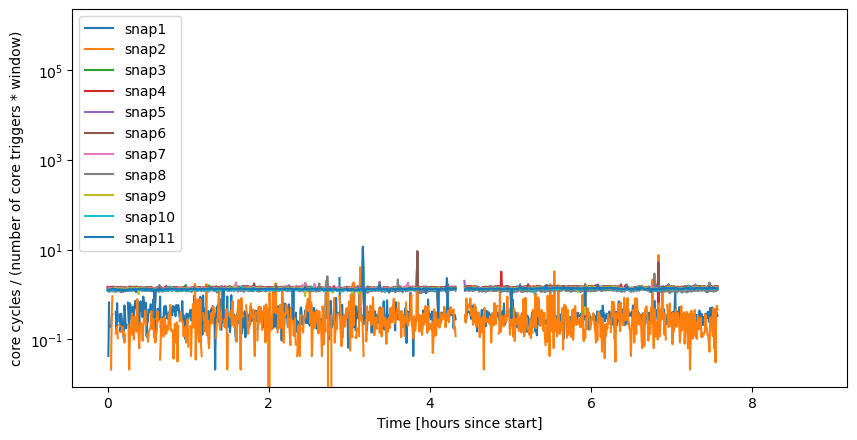

In [16]:
plt.figure(figsize=(10,5),dpi=100)
trigger_window=int(round(1.96e8*100/3e8,1)) #number of clock cycles to travel 100 meters
veto_window=int(round(1.96e8*2000/3e8,1)) #number of clock cycles to travel 2000 meters
for b in ok_snaps:
    core=core_all[b]
    veto=veto_all[b]
    successful_trigger=successful_triggers_all[b]
    readout_done=readout_dones_all[b]
    veto_cycle=veto_cycles_all[b]
    core_cycle=core_cycles_all[b]
    timeaxis=np.asarray(range(len(core)))*(waittime)*(1/60)*(1/60) #time in hours since start of test, approximated as each board having one measurement every 7*32.75 seconds
    plt.semilogy(timeaxis,(core_cycle/(trigger_window*core)),label='snap'+str(b+1))
    plt.ylabel("core cycles / (number of core triggers * window)")
    plt.xlabel("Time [hours since start]")
    plt.legend()
    

In [17]:
(3.9+4.3)/2

4.1